# Tensorflow2 KeyNotes
### == Convolutional Neural Network based Fourier Transform (TF2) 
### Instructions

These serial notebooks are intended to record my practicing and keynotes with deep learning in the framework of TensorFlow 2. Within these notebooks, I demonstrate the networks with specific examples and my personal interpretations.  You can find instructions in each section for each project.  Feel free to refer to it if is helpful for your work. 

In this notebook, I demonstrated an example of using neural networks for audio signal analysis and signal processing in python. First, I take the traditional audio feature extraction method as an example, and then compare the dense neural network with the convolutional neural network in the audio signal noise reduction experiment. The following content is included in this notebook:

1. Audio signal analysis in python (Shot Time Fourier Transform, Audio Features extraction).
2. Audio signal denoising based on dense neural network
3. Audio signal denoising based on convolutional neural network


### Code by Hao, Zhao, Nov, 2020.



### Import the tensorflow library

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0



###  Load the external libraries

In [2]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Conv1D,SimpleRNN,AveragePooling1D,Flatten, Conv1D,Flatten,Reshape

### Load the audio signal

In [3]:
# Define the audio signal (Sample from common voice dataset of Mozilla)
file = "common_voice_en_1075.wav"

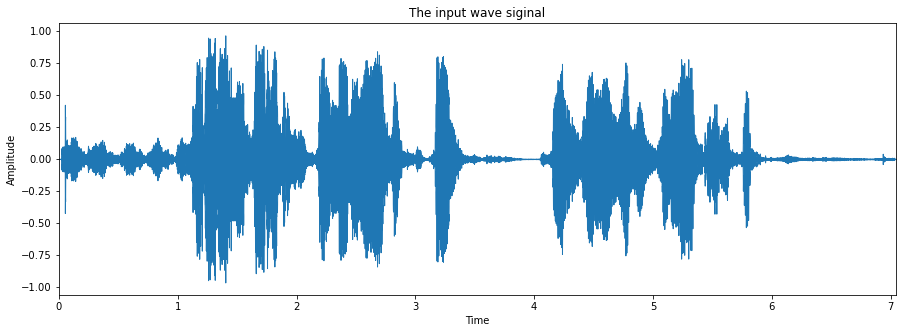

In [4]:
# load the audio file and display

signal,sample_rate  = librosa.load(file) 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(signal,sr=sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("The input wave siginal")
plt.show()

### Derive Amplitude spectrum and Spectrogram

Text(0.5, 1.0, 'Amplitude Spectrum')

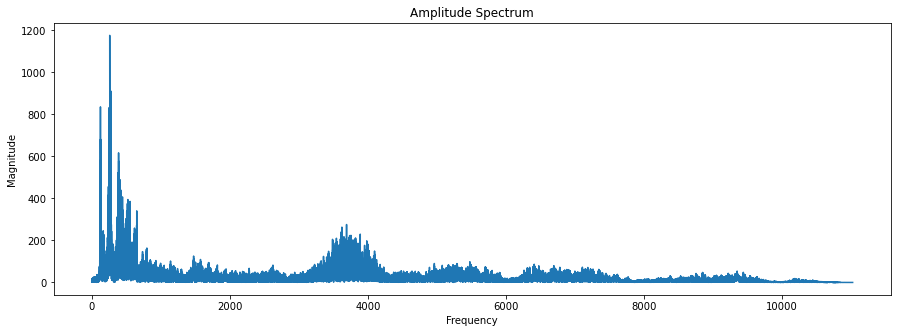

In [5]:
# Apply fft to derive the spectrum and display the spectrum

fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sample_rate ,len(magnitude))

plt.figure(figsize=(15, 5))
plt.plot(frequency[:int(len(frequency)/2)] ,magnitude[:int(len(frequency)/2)] )
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Amplitude Spectrum")

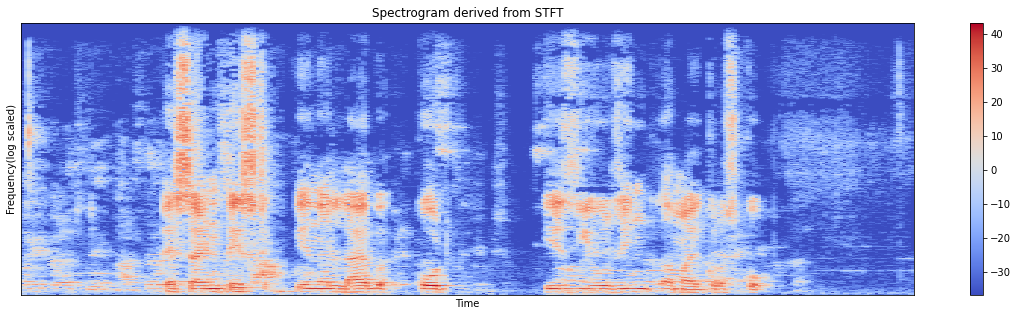

In [6]:
# Derive the Shot-Time-Fourier-Transfrom (STFT)

n_fft      = 2048
hop_length = 512

stft = librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(20, 5))
librosa.display.specshow(log_spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency(log scaled)")
plt.colorbar()
plt.title("Spectrogram derived from STFT")
plt.show()


### Audio signal feature extration

#### (1) Calculate Mel-frequency cepstral coefficients (MFCC)

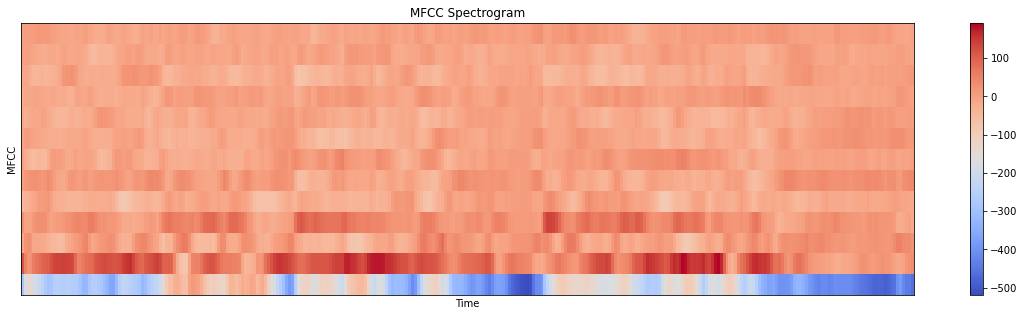

In [7]:


MFCC = librosa.feature.mfcc(signal,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

plt.figure(figsize=(20, 5))
librosa.display.specshow(MFCC,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.title("MFCC Spectrogram")
plt.show()

To be Continue ...